### 1. 红黑树

红黑树的增删查改的时间复杂度均为$log_{2}n$

红黑树相对于AVL树的时间复杂度是一样的，但是优势是当插入或者删除节点时，红黑树实际的调整次数更少，旋转次数更少，因此红黑树插入删除的效率高于AVL树，大量中间件产品中使用了红黑树。

- 根结点是黑色
- 所有叶子都是黑色
- 每个红色结点必须有两个黑色的子结点
- 从任一结点到其每个叶子的所有简单路径都包含相同数目的黑色节点

**插入**

**情形1**:新节点N位于树的根上，没有父节点，直接标记为黑色

**情形2**:新节点的父节点P是黑色（新节点是红色的）。在这种情形下，树仍是有效的。
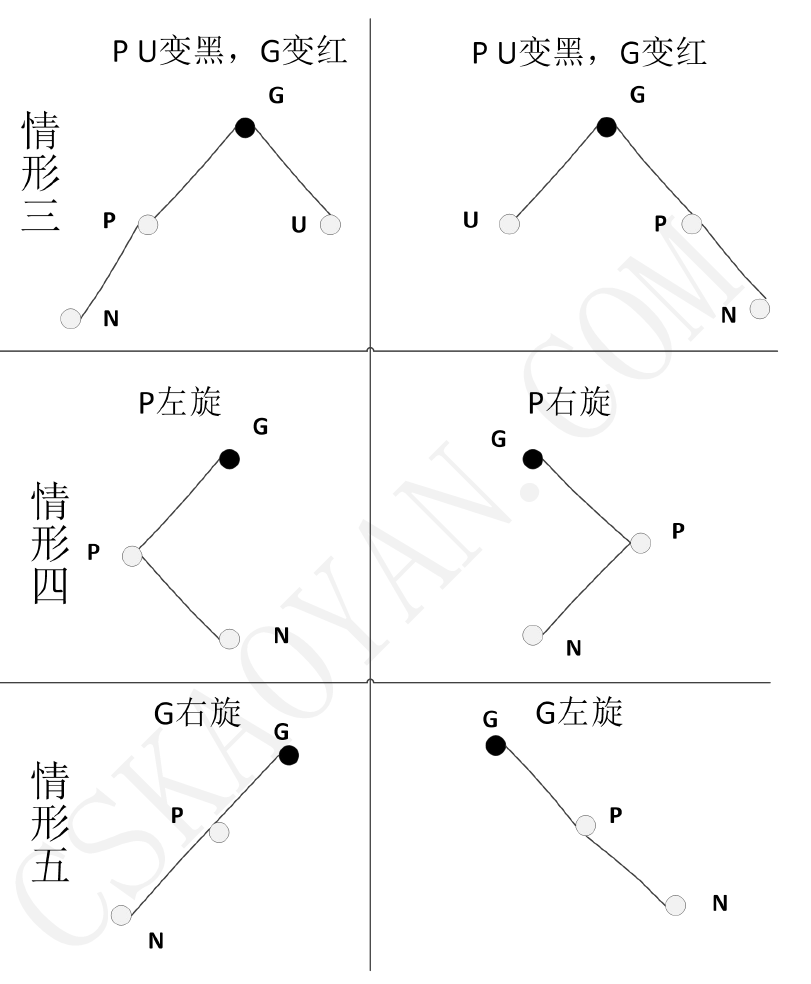

**删除**

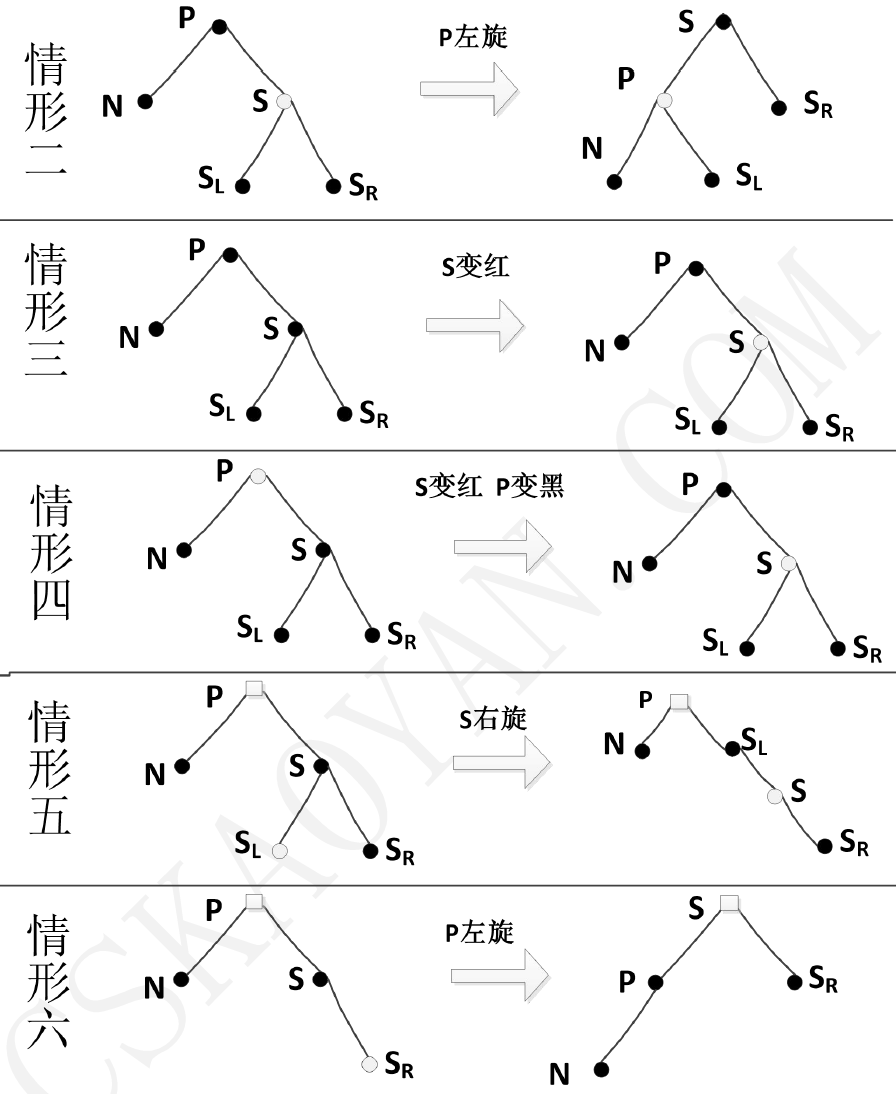

### 2. 快速排序
首先选一个基准，默认选列表中的第一个元素，基准左边的元素小于基准值、右边的元素大于基准值，递归

时间复杂度$O(nlogn)$，空间复杂度$O(nlogn)$

是一种不稳定的排序方法。每趟排序后会将一个元素放到其最终位置上。

In [1]:
def partition(l, first, last):
    # 选基准
    privot = l[first]
    left = first+1
    right = last
    flag = True
    while flag:
        # left等于左边第一个大于基准的元素
        while left<=right and l[left]<=privot:
            left = left+1
        # right等于右边第一个小于基准的元素
        while left<=right and l[right]>=privot:
            right = right-1
        #
        if right<left:
            flag = False
        else:
            # 将大于基准的元素换到右边，小于基准的元素换到左边
            temp = l[left]
            l[left] = l[right]
            l[right] = temp
    # 将基准和小于基准的元素交换
    temp = l[first]
    l[first] = l[right]
    l[right] = temp
    # 返回基准的位置
    return right
    
def quickSort(l, first, last):
    if first<last:
        p = partition(l, first, last)
        quickSort(l, first, p-1)
        quickSort(l, p+1, last)


### 冒泡排序
从后往前两两比较相邻元素的值，若为逆序则交换它们，直到序列比较完，称为一趟冒泡排序。最多做n-1趟冒泡。

空间复杂度O(1)

时间复杂度O(n²)

冒泡排序是一种稳定的排序方法，每趟排序都会将一个元素放置到其最终的位置上
```c
void BubbleSort(ElemType A[],int n){
	for(i=0;i<n-1;i++){
		flag=false;  //本趟冒泡排序是否发生交换
		for(j=n-1;j>1;j--){
			if(A[j-1]>A[j]){
				swap(A[j-1],A[j]);
				flag=true;
			}
		}
		if(flag==false){
			return;
		}
	}
}
```

### 2-opt
2-opt属于局部搜索算法，可以解决组合优化问题

例TSP问题：假设有一个旅行商要从A城市出发经过BCDEFGH这几个城市最后回到A城市(可以理解为约束条件)，目标函数是路程最短(费用最少)。

首先我们可以任选一个可行解s={A,B,C,D,E,F,G,H,A}，并假设s是最优解Smin。然后使用2-opt算法进行问题的求解：随机选取两点i和k，将i之前的路径不变添加到新路径中，将i到k之间的路径翻转其编号后添加到新路径中，将k之后的路径不变添加到新路径中。

原路径: A ==> B ==> C ==> D ==> E ==> F ==>G ==> H ==> A

i = 4, k =7

新路径:

1. (A ==> B ==>C)

2. A ==> B ==> C==> (G ==> F ==> E ==> D)

3. A ==> B ==> C==> G ==> F ==> E ==> D (==> H ==> A)

从而获得一个新的可行解。将可行解代入目标函数可得目标函数值，将其与Smin的目标函数值比较，取两者目标函数值较小的可行解为Smin，直到找不到比Smin还小的函数值为止。

### 蚁群算法（ACO）

https://zhuanlan.zhihu.com/p/137408401

蚁群算法具有以下几个特点：

(1)采用正反馈机制，使得搜索过程不断收敛，最终逼近最优解。

(2)每个个体可以通过释放信息素来改变周围的环境，且每个个体能够感知周围环境的实时变化，个体间通过环境进行间接地通讯。

(3)搜索过程采用分布式计算方式，多个个体同时进行并行计算，大大提高了算法的计算能力和运行效率。

(4)启发式的概率搜索方式不容易陷入局部最优，易于寻找到全局最优解。

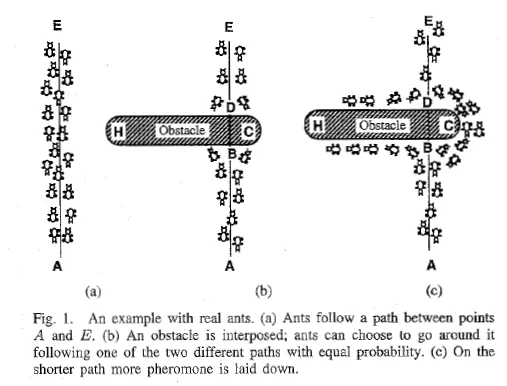

在图（a）中，有一群蚂蚁，假如A是蚁巢，E是食物源（反之亦然）。这群蚂蚁将沿着蚁巢和食物源之间的直线路径行驶。假如在A和E之间突然出现了一个障碍物（图（b）），那么，在B点（或D点）的蚂蚁将要做出决策，到底是向左行驶还是向右行驶？由于一开始路上没有前面蚂蚁留下的 信息素（pheromone） ，蚂蚁朝着两个方向行进的概率是相等的。但是当有蚂蚁走过时，它将会在它行进的路上释放出信息素，并且这种信息素会议一定的速率散发掉。信息素是蚂蚁之间交流的工具之一。它后面的蚂蚁通过路上信息素的浓度，做出决策，往左还是往右。很明显，沿着短边的的路径上信息素将会越来越浓（图（c）），从而吸引了越来越多的蚂蚁沿着这条路径行驶。

**优点：**

分布式特性

鲁棒性强

容易与其它算法结合

**缺点：**

收敛速度慢

容易陷入局部最优

### A*
A\*算法是一个“搜索算法”，实质上是广度优先搜索算法（BFS）的优化。从起点开始，首先遍历起点周围邻近的点，然后再遍历已经遍历过的点邻近的点，逐步的向外扩散，直到找到终点。

A\*算法的作用是“求解最短路径”，如在一张有障碍物的图上移动到目标点，以及八数码问题（从一个状态到另一个状态的最短途径）

A\*算法的思路类似图的Dijkstra算法，采用贪心的策略，即“若A到C的最短路径经过B，则A到B的那一段必须取最短”，找出起点到每个可能到达的点的最短路径并记录。

A\*算法与Dijkstra算法的不同之处在于，A\*算法是一个“启发式”算法，它已经有了一些我们告诉它的先验知识，如“朝着终点的方向走更可能走到”。它不仅关注已走过的路径，还会对未走过的点或状态进行预测。因此A\*算法相较于Dijkstra而言调整了进行BFS的顺序，少搜索了那些“不太可能经过的点”，更快地找到目标点的最短路径。另外一点，由于H选取的不同，A\*算法找到的路径可能并不是最短的，但是牺牲准确率带来的是效率的提升
